In [66]:
import pandas as pd

In [67]:
df=pd.read_csv(r'Sales.csv')

In [68]:
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


# adding features

In [69]:
df['Total_Spent'] = df['TV'] + df['Radio'] + df['Newspaper']
print(df)

        TV  Radio  Newspaper  Sales  Total_Spent
0    230.1   37.8       69.2   22.1        337.1
1     44.5   39.3       45.1   10.4        128.9
2     17.2   45.9       69.3   12.0        132.4
3    151.5   41.3       58.5   16.5        251.3
4    180.8   10.8       58.4   17.9        250.0
..     ...    ...        ...    ...          ...
195   38.2    3.7       13.8    7.6         55.7
196   94.2    4.9        8.1   14.0        107.2
197  177.0    9.3        6.4   14.8        192.7
198  283.6   42.0       66.2   25.5        391.8
199  232.1    8.6        8.7   18.4        249.4

[200 rows x 5 columns]


In [70]:
df['Previous_Sales'] = df['Sales'].shift(1)  # Lagged sales
print(df)


        TV  Radio  Newspaper  Sales  Total_Spent  Previous_Sales
0    230.1   37.8       69.2   22.1        337.1             NaN
1     44.5   39.3       45.1   10.4        128.9            22.1
2     17.2   45.9       69.3   12.0        132.4            10.4
3    151.5   41.3       58.5   16.5        251.3            12.0
4    180.8   10.8       58.4   17.9        250.0            16.5
..     ...    ...        ...    ...          ...             ...
195   38.2    3.7       13.8    7.6         55.7            17.3
196   94.2    4.9        8.1   14.0        107.2             7.6
197  177.0    9.3        6.4   14.8        192.7            14.0
198  283.6   42.0       66.2   25.5        391.8            14.8
199  232.1    8.6        8.7   18.4        249.4            25.5

[200 rows x 6 columns]


In [71]:
df['TV_Radio_Interact'] = df['TV'] * df['Radio']
print(df)

        TV  Radio  Newspaper  Sales  Total_Spent  Previous_Sales  \
0    230.1   37.8       69.2   22.1        337.1             NaN   
1     44.5   39.3       45.1   10.4        128.9            22.1   
2     17.2   45.9       69.3   12.0        132.4            10.4   
3    151.5   41.3       58.5   16.5        251.3            12.0   
4    180.8   10.8       58.4   17.9        250.0            16.5   
..     ...    ...        ...    ...          ...             ...   
195   38.2    3.7       13.8    7.6         55.7            17.3   
196   94.2    4.9        8.1   14.0        107.2             7.6   
197  177.0    9.3        6.4   14.8        192.7            14.0   
198  283.6   42.0       66.2   25.5        391.8            14.8   
199  232.1    8.6        8.7   18.4        249.4            25.5   

     TV_Radio_Interact  
0              8697.78  
1              1748.85  
2               789.48  
3              6256.95  
4              1952.64  
..                 ...  
195     

In [72]:
import numpy as np

df['TV_log'] = np.log(df['TV'])
print(df)

        TV  Radio  Newspaper  Sales  Total_Spent  Previous_Sales  \
0    230.1   37.8       69.2   22.1        337.1             NaN   
1     44.5   39.3       45.1   10.4        128.9            22.1   
2     17.2   45.9       69.3   12.0        132.4            10.4   
3    151.5   41.3       58.5   16.5        251.3            12.0   
4    180.8   10.8       58.4   17.9        250.0            16.5   
..     ...    ...        ...    ...          ...             ...   
195   38.2    3.7       13.8    7.6         55.7            17.3   
196   94.2    4.9        8.1   14.0        107.2             7.6   
197  177.0    9.3        6.4   14.8        192.7            14.0   
198  283.6   42.0       66.2   25.5        391.8            14.8   
199  232.1    8.6        8.7   18.4        249.4            25.5   

     TV_Radio_Interact    TV_log  
0              8697.78  5.438514  
1              1748.85  3.795489  
2               789.48  2.844909  
3              6256.95  5.020586  
4       

# Linear Regression

Import the necessary libraries:

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

Load and preprocess your dataset 

In [64]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the Linear Regression model:

In [55]:
# Initialize the Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

Predict using the model:

In [56]:
# Predict on the test set
y_pred = model.predict(X_test)

In [74]:
print(y_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


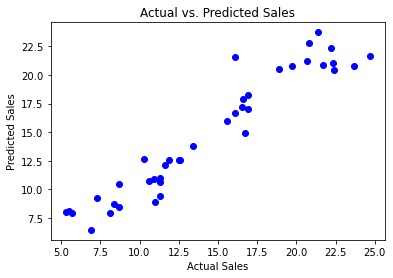

In [73]:
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are your actual and predicted values, respectively
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


Evaluate the model:

In [58]:
from sklearn.metrics import mean_squared_error
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.9077569102710923


 Interpret the model coefficients:

In [59]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1.2748262109549344


In [60]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.7052146229349232


In [61]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.9059011844150826


In [62]:
# Print the coefficients
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

Coefficients:
TV: 0.054509270837219764
Radio: 0.10094536239295575
Newspaper: 0.004336646822034021
Intercept: 4.714126402214134
